In [55]:
import pandas as pd
import numpy as np
import polars as pl

In [56]:
games_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")
records_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/standings.csv", index_col="team")[["season","pct"]].groupby(["team"])["pct"].mean()

weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')#.groupby("month_number")

games_df["home_team_win_perecentage"] = games_df["home_team"].map(records_df)
games_df["away_team_win_perecentage"] = games_df["away_team"].map(records_df)

games_df["month_number"] = pd.to_numeric(games_df['gameday'].str[5:7])

phoenixList = ['ARI', 'LV', 'SD']
d1=dict.fromkeys(phoenixList, 'Phoenix')
columbusList = ['CIN', 'CLE', 'PIT']
d2=dict.fromkeys(columbusList, 'Columbus')
sacramentoList = ['LAR', 'LAC', 'LA', 'SF', 'OAK']
d3=dict.fromkeys(sacramentoList, 'Sacramento')
tallahasseeList = ['JAX', 'TB', 'MIA']
d4=dict.fromkeys(tallahasseeList, 'Tallahassee')
madisonList = ['GB','CHI']
d5=dict.fromkeys(madisonList, 'Madison')
topekaList = ['KC','STL']
d6=dict.fromkeys(topekaList, 'Topeka')
austinList = ['DAL','HOU']
d7=dict.fromkeys(austinList, 'Austin')
trentonList = ['PHI', 'NYJ', 'NYG']
d8=dict.fromkeys(trentonList, 'Trenton')

d = {**d1,**d2,**d3,**d4,**d5,**d6,**d7, **d8, "CAR": "Columbia", "TEN": "Nashville", "BAL": "Annapolis", "WAS": "Washington", "SEA": "Olympia", "DEN": "Denver", "NE": "Providence", "IND": "Indianapolis", "MIN": "Saint Paul", "DET": "Lansing", "BUF": "Albany", "ATL": "Atlanta", "NO": "Jackson"}
games_df['homeTeamNearestWeatherStation'] = games_df['home_team'].map(d)
games_df['awayTeamNearestWeatherStation'] = games_df['away_team'].map(d)

games_df = games_df.loc[games_df['gameday']<='2024-03-01']
games_df['month_number'].unique()

array([ 9, 10, 11, 12,  1,  2], dtype=int64)

In [57]:
weather_df['date']= pd.to_datetime(weather_df['date'])
january_weather_df = weather_df[weather_df['date'].dt.month == 1].groupby('city_name')['avg_temp_c'].mean()
february_weather_df = weather_df[weather_df['date'].dt.month == 2].groupby('city_name')['avg_temp_c'].mean()
september_weather_df = weather_df[weather_df['date'].dt.month == 9].groupby('city_name')['avg_temp_c'].mean()
october_weather_df = weather_df[weather_df['date'].dt.month == 10].groupby('city_name')['avg_temp_c'].mean()
november_weather_df = weather_df[weather_df['date'].dt.month == 11].groupby('city_name')['avg_temp_c'].mean()
december_weather_df = weather_df[weather_df['date'].dt.month == 12].groupby('city_name')['avg_temp_c'].mean()

games_df['avgHomeTeamJanTemp'] = games_df['homeTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamFebTemp'] = games_df['homeTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamSepTemp'] = games_df['homeTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamOctTemp'] = games_df['homeTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamNovTemp'] = games_df['homeTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamDecTemp'] = games_df['homeTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df['avgAwayTeamJanTemp'] = games_df['awayTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamFebTemp'] = games_df['awayTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamSepTemp'] = games_df['awayTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamOctTemp'] = games_df['awayTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamNovTemp'] = games_df['awayTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamDecTemp'] = games_df['awayTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df.loc[games_df['month_number']== 1, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamDecTemp']

games_df.loc[games_df['month_number']== 1, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamDecTemp']

games_df['home_acclimitisation_advantage'] = (games_df['awayAcclimatisedTemp']-games_df['temp'])-(games_df['homeAcclimatisedTemp'] - games_df['temp'])
games_df

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,avgHomeTeamDecTemp,avgAwayTeamJanTemp,avgAwayTeamFebTemp,avgAwayTeamSepTemp,avgAwayTeamOctTemp,avgAwayTeamNovTemp,avgAwayTeamDecTemp,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,47.1650,17.2256,17.7656,63.875000,47.5250,36.207500,22.1300,73.707500,63.875000,NaN
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,26.3150,31.0208,32.9525,67.895000,56.3150,44.670435,34.8350,61.655000,67.895000,6.240000
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,36.4400,28.5440,32.8352,65.307826,57.0200,42.830000,36.4400,65.307826,65.307826,0.000000
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,26.3150,46.0472,51.6200,69.197391,65.0000,53.652500,46.8800,61.655000,69.197391,7.542391
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,33.8900,21.2144,26.3624,63.560000,53.3750,41.337500,30.8975,66.192500,63.560000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,2023_20_TB_DET,2023,DIV,20,2024-01-21,Sunday,15:00,TB,23.0,DET,...,30.9200,50.8064,55.0040,79.760000,70.2275,59.427500,56.9300,23.502500,50.806400,NaN
6702,2023_20_KC_BUF,2023,DIV,20,2024-01-21,Sunday,18:30,KC,27.0,BUF,...,30.8975,31.0208,32.9525,67.895000,56.3150,44.670435,34.8350,21.214400,31.020800,9.806400
6703,2023_21_KC_BAL,2023,CON,21,2024-01-28,Sunday,15:00,KC,17.0,BAL,...,40.7150,31.0208,32.9525,67.895000,56.3150,44.670435,34.8350,33.915200,31.020800,-2.894400
6704,2023_21_DET_SF,2023,CON,21,2024-01-28,Sunday,18:30,DET,31.0,SF,...,46.8800,23.5025,24.4256,60.185000,51.5750,39.680000,30.9200,46.047200,23.502500,-22.544700


In [37]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

NameError: name 'df' is not defined

In [ ]:
df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2086745645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2086745645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [ ]:
df1 = df.iloc[6460]
df1

away_team                       LAC
away_score                     28.0
home_team                       MIN
home_score                     24.0
location                       Home
home_winning_margin            -4.0
total                          52.0
overtime                        0.0
away_rest                         7
home_rest                        10
away_moneyline               -110.0
home_moneyline               -110.0
spread_line                     1.0
away_spread_odds             -115.0
home_spread_odds             -105.0
total_line                     54.0
under_odds                   -110.0
over_odds                    -110.0
div_game                          0
indoor_game                       1
temp                            0.0
wind                            0.0
home_win                          0
over_totals_win                   0
over_winning_margin            -2.0
home_spread_win                   0
home_spread_winning_margin     -5.0
Name: 6460, dtype: object

In [ ]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,...,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000
mean,20.060332,22.328891,2.268558,42.389223,0.058899,7.473345,7.515621,58.180138,-92.628977,2.282531,...,-57.279736,0.377472,0.246489,40.120952,5.904987,0.542992,0.465033,-1.148682,0.470335,-0.013972
std,10.662743,11.068656,14.336087,16.336923,0.235453,1.982782,2.092829,242.422769,277.724551,5.893971,...,69.812454,0.484789,0.430997,30.232845,5.983662,0.498184,0.498812,15.942847,0.499155,13.027055
min,0.000000,0.000000,-49.000000,0.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,-125.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,-51.000000,0.000000,-52.000000
25%,13.000000,15.000000,-6.000000,33.000000,0.000000,7.000000,7.000000,-107.000000,-209.000000,-2.500000,...,-108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-8.000000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,-103.000000,0.000000,0.000000,48.000000,5.000000,1.000000,0.000000,-1.000000,0.000000,-0.500000
75%,27.000000,30.000000,10.000000,52.000000,0.000000,7.000000,7.000000,186.000000,0.000000,6.500000,...,0.000000,1.000000,0.000000,65.000000,10.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,113.000000,1.000000,1.000000,109.000000,71.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [ ]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6978,6978,6978
unique,35,35,2
top,BAL,NE,Home
freq,231,239,6894


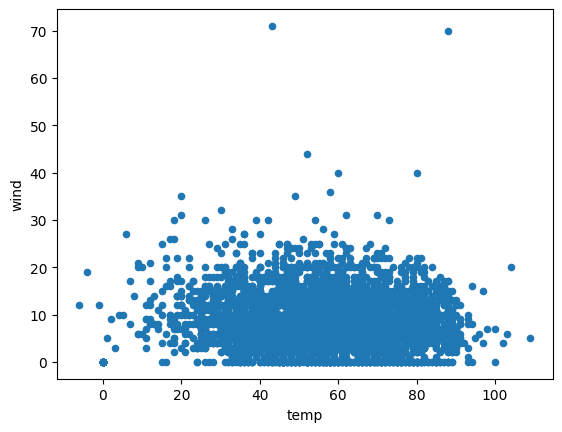

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [ ]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.0,0,1,0.0,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.0,1,1,0.0,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.0,1,1,0.0,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.0,0,1,0.0,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,0.0,0,1,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,WAS,0.0,DAL,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,1,0.0,0.0,0,0,-46.5,0,-5.5
6967,MIN,0.0,DET,0.0,Home,0.0,0.0,0.0,7,6,...,-110.0,1,1,0.0,0.0,0,0,-47.0,0,-5.5
6969,JAX,0.0,IND,0.0,Home,0.0,0.0,0.0,7,7,...,-108.0,1,1,0.0,0.0,0,0,-46.5,0,-2.0
6970,SEA,0.0,LA,0.0,Home,0.0,0.0,0.0,10,7,...,-110.0,1,1,0.0,0.0,0,0,-47.0,0,-5.5


In [ ]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0.0,0,0,80.0,12.0,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,0.0,1,0,78.0,12.0,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0.0,0,0,67.0,10.0,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0.0,0,0,76.0,8.0,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,0.0,1,0,73.0,5.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,MIA,0.0,NYJ,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,0,0.0,0.0,0,0,-45.0,0,-3.0
6974,NYG,0.0,PHI,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,0,0.0,0.0,0,0,-43.0,0,-5.0
6975,CIN,0.0,PIT,0.0,Home,0.0,0.0,0.0,7,11,...,-108.0,1,0,0.0,0.0,0,0,-43.5,1,1.0
6976,NO,0.0,TB,0.0,Home,0.0,0.0,0.0,7,7,...,-108.0,1,0,0.0,0.0,0,0,-43.0,0,-2.5


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [ ]:
# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\744768695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin']] = \


In [ ]:
# removed temp and wind columns as they are irrelant for indoor games
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2244634949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \


In [ ]:
from sklearn.model_selection import train_test_split

indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.15)

In [ ]:
from sklearn.model_selection import train_test_split

outdoor_X_train, outdoor_X_test, outdoor_y_train, outdoor_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.15)

In [ ]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,home_win,home_spread_win,home_spread_winning_margin
3852,31,8,0,-2.312482,-0.256272,-0.213843,-0.221009,1.001256,-0.928870,0.888933,-0.813685,1.724218,-0.596612,-0.732329,2.405534,-0.761203,-1.056230,-0.948974,-2.922236
3170,24,8,0,-0.223589,-0.256272,-0.716315,-0.693816,0.263315,-0.147215,-0.225348,1.866521,-0.892739,-0.377555,2.170555,-0.722151,-0.761203,-1.056230,-0.948974,-0.140239
608,22,20,0,-0.367650,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,1.660358,0.550564,0.510902,0.608202,0.780441,0.929384,1.313709,-1.056230,-0.948974,-1.158999
3035,24,5,0,-0.367650,3.902104,-0.213843,-0.221009,-1.246302,1.164439,-1.339628,-0.717101,-0.714311,-0.706141,2.143298,-0.678305,-0.761203,-1.056230,1.053769,0.212409
6112,11,5,0,0.352658,-0.256272,-0.213843,-0.221009,-1.056546,0.977605,-1.082487,-0.777466,-0.797577,-0.158498,-0.786844,-0.605229,1.313709,0.946764,1.053769,0.878521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1,15,0,1.289058,-0.256272,0.288629,0.251797,-0.234268,0.348468,-1.082487,0.550564,0.510902,-0.158498,0.780441,0.929384,1.313709,0.946764,1.053769,1.897280
257,32,20,0,0.208596,-0.256272,0.288629,-0.221009,-0.234268,0.348468,2.003213,0.550564,0.510902,0.060559,0.780441,0.929384,-0.761203,0.946764,-0.948974,-0.688802
4819,32,13,0,1.072966,-0.256272,-0.213843,-0.221009,-0.672816,-0.055705,-0.396776,-0.656736,-0.797577,-1.034726,2.143298,-0.678305,-0.761203,0.946764,1.053769,1.348717
1585,32,13,0,-0.943897,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,0.631791,0.550564,0.510902,-0.487084,0.780441,0.929384,-0.761203,-1.056230,-0.948974,-1.315731


In [ ]:
indoor_X_train.corr()

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,home_win,home_spread_win,home_spread_winning_margin
away_team,1.000000,-0.070063,0.045836,-0.058338,-0.000441,0.012800,0.006784,-0.017653,0.014166,-0.062699,0.012214,-0.000139,-0.019660,-0.023601,0.021573,0.020284,-0.049544,-0.033829,-0.034991
home_team,-0.070063,1.000000,0.070265,0.031504,-0.017957,0.053316,0.013981,-0.028781,0.033053,0.077909,0.072646,0.066422,0.018719,0.056613,0.104895,0.007189,0.031714,0.006956,-0.001384
location,0.045836,0.070265,1.000000,-0.035358,0.041318,0.240129,0.230941,-0.018917,0.022291,-0.044245,0.007879,0.002746,0.047613,0.018921,-0.012252,-0.058300,-0.060963,-0.027322,-0.018333
home_winning_margin,-0.058338,0.031504,-0.035358,1.000000,-0.041389,0.000840,0.024324,0.331362,-0.321504,0.406866,-0.046174,0.079034,0.041743,0.020173,0.003611,-0.000553,0.762008,0.670969,0.907272
overtime,-0.000441,-0.017957,0.041318,-0.041389,1.000000,0.024224,-0.013369,-0.005813,0.011563,-0.020543,-0.019587,0.020224,0.036066,-0.013900,0.009854,0.019011,-0.012449,-0.071948,-0.035846
away_rest,0.012800,0.053316,0.240129,0.000840,0.024224,1.000000,0.295800,0.022994,-0.020698,0.036257,-0.026727,-0.001963,0.027959,-0.028420,-0.052795,-0.031797,0.011274,-0.005392,-0.015772
home_rest,0.006784,0.013981,0.230941,0.024324,-0.013369,0.295800,1.000000,0.059096,-0.055115,0.084625,0.032853,0.016596,0.036668,0.009889,-0.025928,-0.100227,0.020072,-0.002774,-0.012334
away_moneyline,-0.017653,-0.028781,-0.018917,0.331362,-0.005813,0.022994,0.059096,1.000000,-0.967154,0.823838,-0.141406,0.121696,0.039175,-0.001844,-0.076776,-0.001147,0.312530,-0.079097,-0.016570
home_moneyline,0.014166,0.033053,0.022291,-0.321504,0.011563,-0.020698,-0.055115,-0.967154,1.000000,-0.782692,0.149446,-0.084154,-0.039235,0.031484,0.113841,0.011210,-0.288948,0.061916,0.008419
spread_line,-0.062699,0.077909,-0.044245,0.406866,-0.020543,0.036257,0.084625,0.823838,-0.782692,1.000000,-0.120731,0.204577,0.041701,0.077738,0.029056,-0.003544,0.358274,-0.075380,-0.015025


In [ ]:
indoor_y_train

3852    1
3170    0
608     1
3035    1
6112    1
       ..
1890    0
257     0
4819    1
1585    0
6179    1
Name: over_totals_win, Length: 1462, dtype: int32

In [ ]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,home_win,home_spread_win,home_spread_winning_margin
4794,23,4,0,1.000935,-0.256272,-0.213843,-0.221009,0.697646,-0.597143,0.631791,-0.717101,-0.738101,0.170088,2.184183,-0.736767,1.313709,0.946764,1.053769,0.800155
5734,21,7,0,0.352658,-0.256272,-0.213843,-0.221009,-0.854139,0.851777,-0.825345,-0.861977,1.771799,0.827259,-0.623301,-0.649075,-0.761203,0.946764,1.053769,0.760972
3485,30,13,0,0.640781,-0.256272,-0.213843,-0.221009,-1.436058,1.309331,-1.511056,-0.753320,1.700428,-0.706141,-0.650558,-0.605229,-0.761203,0.946764,1.053769,1.387900
159,5,5,0,0.136565,-0.256272,-1.721258,-1.639428,-0.234268,0.348468,0.631791,0.550564,0.510902,-0.377555,0.780441,0.929384,1.313709,0.946764,-0.948974,-0.140239
6046,27,13,0,0.424689,-0.256272,-1.721258,-1.639428,0.427771,-0.318798,0.203222,-0.861977,1.759904,-0.158498,-0.636929,-0.634459,-0.761203,0.946764,1.053769,0.369141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,23,4,0,-0.151558,-0.256272,-1.721258,-1.639428,1.009690,-1.081388,0.974647,-0.777466,-0.797577,-0.048969,-0.718701,-0.678305,1.313709,-1.056230,-0.948974,-0.610436
220,0,1,0,1.505151,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,-0.053920,0.550564,0.510902,-1.691897,0.780441,0.929384,-0.761203,0.946764,1.053769,1.662182
1879,34,7,0,-1.304051,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,-0.996773,0.550564,0.510902,-1.801426,0.780441,0.929384,-0.761203,-1.056230,-0.948974,-0.963083
3227,34,4,0,-0.007496,-0.256272,0.288629,0.251797,0.431987,-0.318798,0.203222,-0.789539,1.736114,-0.268026,-0.691444,-0.561383,1.313709,0.946764,-0.948974,-0.101056


In [ ]:
indoor_y_test

4794    0
5734    0
3485    0
159     0
6046    1
       ..
6886    0
220     1
1879    1
3227    0
800     1
Name: over_totals_win, Length: 258, dtype: int32

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
indoor_model = LogisticRegression()
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.4883720930232558


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
outdoor_model = LogisticRegression()
outdoor_model.fit(outdoor_X_train, outdoor_y_train)
print(outdoor_model.score(outdoor_X_test, outdoor_y_test)) 

0.5449936628643853


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tabulate import tabulate

indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_y_pred = outdoor_model.predict(outdoor_X_test)

print(tabulate(
    [
        ['Indoor', accuracy_score(indoor_y_test, indoor_y_pred), precision_score(indoor_y_test, indoor_y_pred), recall_score(indoor_y_test, indoor_y_pred)], 
        ['Outdoor', accuracy_score(outdoor_y_test, outdoor_y_pred), precision_score(outdoor_y_test, outdoor_y_pred), recall_score(outdoor_y_test, outdoor_y_pred)]
    ], headers=['Model', 'Accuracy score', 'Precision score', 'Recall score'], tablefmt='orgtbl'
))


| Model   |   Accuracy score |   Precision score |   Recall score |
|---------+------------------+-------------------+----------------|
| Indoor  |         0.488372 |          0.425373 |       0.508929 |
| Outdoor |         0.544994 |          0.491713 |       0.25     |
